In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
from pathlib import Path

# --- Variables / Thème ---
bg_color = "#1e1e2f"
primary_color = "#f4f4f4"
secondary_color = "#ff6f61"
third_color = "#ffc24a"
team = "Atalanta U23"

# Thème Matplotlib (fond sombre + texte clair)
mpl.rcParams.update({
    "figure.facecolor": bg_color,
    "axes.facecolor": bg_color,
    "savefig.facecolor": bg_color,
    "axes.edgecolor": primary_color,
    "axes.labelcolor": primary_color,
    "xtick.color": primary_color,
    "ytick.color": primary_color,
    "text.color": primary_color,
    "grid.color": primary_color,
    "grid.alpha": 0.15,
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False,
    "font.size": 12,
})

# Cycle de couleurs (pour lignes/barres)
mpl.rcParams["axes.prop_cycle"] = plt.cycler(color=[secondary_color, third_color, primary_color])

# Options d’affichage pandas (optionnel)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)

In [29]:
stats = {
    "age_moyen": {
        "Atalanta U23": 20.8,
        "Milan Futuro": 20.9,
        "Juventus Next Gen": 23.0,
        "Pontedera": 24.2,
        "Cavese": 24.4,
        "Giugliano": 24.4,
        "Virtus Verona": 24.5,
        "Arzignano Valchiampo": 24.8,
        "Sorrento": 25.0,
        "Carpi": 25.0,
        "Rimini": 25.1,
        "Union Clodiense Chioggia": 25.1,
        "Ascoli": 25.2,
        "Campobasso": 25.3,
        "AlbinoLeffe": 25.4,
        "Crotone": 25.4
    },
    "goals": {  # tableau "Total" n°1
        "Atalanta U23": 80,
        "Crotone": 74,
        "Pescara": 71,
        "Ternana": 70,
        "Padova": 66,
        "Avellino": 65,
        "Potenza": 64,
        "Virtus Entella": 63,
        "Vicenza": 63,
        "Audace Cerignola": 62,
        "Catania": 61,
        "Giugliano": 59,
        "Torres": 58,
        "FeralpiSalò": 56,
        "Benevento": 56
    },
    "possession": {
        "Picerno": 61.7,
        "Trento": 58.1,
        "Atalanta U23": 57.6,
        "Benevento": 56.1,
        "Padova": 55.1,
        "Potenza": 54.2,
        "Torres": 54.0,
        "Pescara": 53.7,
        "Arezzo": 53.5,
        "Ternana": 53.3,
        "Avellino": 53.2,
        "Triestina": 53.2,
        "Crotone": 53.0,
        "Milan Futuro": 52.8,
        "Carpi": 52.6,
        "Gubbio": 52.5
    },
    "shots": {  # tableau "Total" n°2
        "Pescara": 627,
        "Vicenza": 604,
        "Vis Pesaro": 583,
        "Audace Cerignola": 579,
        "Atalanta U23": 554,
        "Benevento": 552,
        "FeralpiSalò": 538,
        "GIANA Erminio": 534,
        "Lucchese": 534,
        "Crotone": 533,
        "Ternana": 532,
        "Padova": 528,
        "Trento": 513,
        "Arezzo": 489,
        "Triestina": 481
    },
    "ppda": {
        "Pescara": 7.11,
        "Vis Pesaro": 7.34,
        "Trento": 7.61,
        "Benevento": 7.82,
        "Triestina": 8.33,
        "Torres": 8.38,
        "Carpi": 8.43,
        "Audace Cerignola": 8.44,
        "Picerno": 8.62,
        "Arezzo": 8.63,
        "Potenza": 8.66,
        "Trapani": 8.74,
        "Lecco": 8.90,
        "Avellino": 8.94,
        "Milan Futuro": 8.95,
        "Atalanta U23": 8.97
    },
    "passes_par_90": {
        "Atalanta U23": 471.61,
        "Ternana": 418.84,
        "Padova": 452.09,
        "Pescara": 375.70,
        "Picerno": 451.07,
        "Trento": 427.93,
        "FeralpiSalò": 407.54,
        "GIANA Erminio": 374.96,
        "Benevento": 430.59,
        "Audace Cerignola": 382.77,
        "Triestina": 391.13,
        "Torres": 389.47,
        "Virtus Verona": 395.10,
        "SPAL": 382.31,
        "Vicenza": 369.85,
        "Avellino": 387.55
    },
    "ppda_against": {
        "Triestina": 13.07,
        "Padova": 12.95,
        "Atalanta U23": 12.69,
        "Benevento": 12.60,
        "Ternana": 12.30,
        "Potenza": 12.29,
        "Picerno": 11.95,
        "GIANA Erminio": 11.90,
        "Trento": 11.87,
        "FeralpiSalò": 11.81,
        "Juventus Next Gen": 11.77,
        "Casertana": 11.77,
        "SPAL": 11.61,
        "Vicenza": 11.57,
        "Torres": 11.44,
        "Perugia": 11.31
    },
    "touches_in_box": {
        "Atalanta U23": 890,
        "Pescara": 852,
        "Padova": 774,
        "Audace Cerignola": 770,
        "Triestina": 758,
        "Benevento": 748,
        "FeralpiSalò": 747,
        "Trapani": 740,
        "Ternana": 729,
        "Vicenza": 722,
        "Avellino": 692,
        "Torres": 692,
        "GIANA Erminio": 686
    },
    "minutes_atalanta_u23_seriec_2024_25": {
    # Gardiens
    "Paolo Vismara": 810,
    "Piotr Pardel": 1170,
    "Tommaso Bertini": 630,
    "Matevz Dajcar": 810,
    "Andrea Torriani": 0,
    "Lorenzo Sala": 0,
    "Gabriel Bugli": 0,

    # Défenseurs
    "Albert Navarro": 2708,
    "Relja Obric": 2260,
    "Tommaso Del Lungo": 2361,
    "Federico Bergonzi": 2234,
    "Andrea Ceresoli": 834,
    "Pietro Comi": 393,
    "Pietro Tornaghi": 500,
    "Guillaume Renault": 84,
    "Gabriele Berto": 43,
    "Mattia Tavanti": 0,
    "Samuele Ghezzi": 20,
    "Pietro Asiatico": 0,
    "Alberto Masi": 0,
    "Manuel Maffessoli": 0,
    "Max Bilac": 0,

    # Milieux / ailiers / MO
    "Simone Panada": 2931,
    "Brandon Soppy": 200,
    "Lorenzo Riccio": 0,
    "Alberto Manzoni": 891,
    "Federico Cassa": 1558,
    "Lorenzo Bernasconi": 2831,
    "Emmanuel Gyabuaa": 2976,
    "Andrea Bonanomi": 45,
    "Javison Idele": 100,
    "Andrea Sodero": 88,
    "Alessandro Cortinovis": 10,
    "Mateo Scheffer Bracco": 1196,
    "Erdis Kraja": 214,
    "Davide Ghislandi": 1103,
    "Daniel Armstrong": 0,
    "Endri Muhameti": 306,
    "Lorenzo Peli": 34,
    "Mannah Chiwisa": 14,
    "Filippo Mencaraglia": 128,
    "Digne Kaelas Pounga": 372,

    # Attaquants
    "Vanja Vlahović": 2412,
    "Dominic Vavassori": 1716,
    "Tommaso De Nipoti": 951,
    "Filippo Alessio": 1507,
    "Edoardo Lonardo": 228,
    "Candas Fiogbe": 76,
    "Henry Camara": 64,
    "Alexandru Capac": 0,
    "Nicolò Artesani": 559,
    },
    "minutes_vavassori_seriec_2024_25": {
        1: 78,
        2: 56,
        3: 0,
        4: 29,
        5: 65,
        6: 81,
        7: 57,
        8: 90,
        9: 0,
        10: 79,
        11: 56,
        12: 45,
        13: 45,
        14: 90,
        15: 0,
        16: 0,
        17: 52,
        18: 0,
        19: 0,
        20: 0,
        21: 0,
        22: 0,
        23: 0,
        24: 0,
        25: 35,
        26: 57,
        27: 90,
        28: 89,
        29: 90,
        30: 90,
        31: 90,
        32: 62,
        33: 0,
        34: 90,
        35: 57,
        36: 27,
        37: 26,
        38: 90,
    }


}


In [12]:
def plot_stat_ranking(team_name: str, title: str, stat_dict: dict,
                      lower_is_better: bool = False,
                      is_percent: bool = False):
    """
    Classement horizontal pour une stat (dict: club -> valeur) avec :
      - mise en avant de `team_name`
      - `lower_is_better`: True => plus petite valeur en haut
      - noms d'équipes alignés à droite, à distance constante du bord (x=0)
      - `is_percent`: True => affiche 'x.x %', False => format numérique sans '%'
    """
    # --- Data ---
    df = pd.DataFrame(list(stat_dict.items()), columns=["team", "value"])
    df = df.sort_values("value", ascending=lower_is_better).reset_index(drop=True)

    # --- Figure / Axes ---
    max_name_len = int(df["team"].str.len().max())
    fig_height = max(6, 0.55 * len(df) + 2)
    fig_width = 8 + 0.03 * max(0, max_name_len - 12)  # élargit si noms longs
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), facecolor=bg_color)
    ax.set_facecolor(bg_color)
    ax.axis('on')  # on garde l'axe Y pour les ticklabels (noms d'équipes)

    # --- Barres ---
    bar_height = 0.6
    v_max = float(df["value"].max())
    v_min = float(df["value"].min())

    right_margin = max(0.12 * v_max, 0.5)

    # formatage des valeurs
    def fmt(v):
        if is_percent:
            return f"{v:.1f} %"
        if v_max >= 1000:
            return f"{v:,.0f}".replace(",", " ")
        return f"{v:.2f}".rstrip("0").rstrip(".")

    y = np.arange(len(df))

    for i, (club, value) in enumerate(zip(df["team"], df["value"])):
        color = secondary_color if club == team_name else primary_color
        ax.barh(i, value, height=bar_height, color=color, edgecolor='none')

        # valeur au bout de la barre (décalage fixe)
        val_pad = max(0.02 * v_max, 0.5)
        ax.text(value + val_pad, i, fmt(value),
                va='center', ha='left', color=primary_color, fontsize=12)

    # --- Noms d'équipes : à droite, distance constante du bord gauche (x=0) ---
    ax.set_yticks(y)
    ax.set_yticklabels(df["team"])
    for lbl in ax.get_yticklabels():
        lbl.set_horizontalalignment('right')
        lbl.set_color(primary_color)
        lbl.set_fontsize(12)

    # place l'axe Y sur x=0 (bord gauche des barres) pour un padding uniforme
    ax.spines['left'].set_position(('data', 0))
    ax.spines['left'].set_color(primary_color)
    ax.spines['left'].set_linewidth(0.8)

    # padding des étiquettes Y en points (distance constante)
    ax.tick_params(axis='y', which='major', pad=8, length=0, colors=primary_color)

    # Nettoyage & grille
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(True, axis='x', alpha=0.15)
    ax.grid(False, axis='y')  # <— correction du SyntaxError

    ax.set_xticks([])  # pas d’échelle numérique en x

    # Limites et ordre (top-first)
    ax.set_ylim(-1, len(df))
    ax.set_xlim(0, v_max + right_margin)
    ax.invert_yaxis()

    # Titre
    plt.title(title, fontsize=24, fontweight='bold', color=primary_color, pad=20)
    plt.tight_layout()
    plt.show()

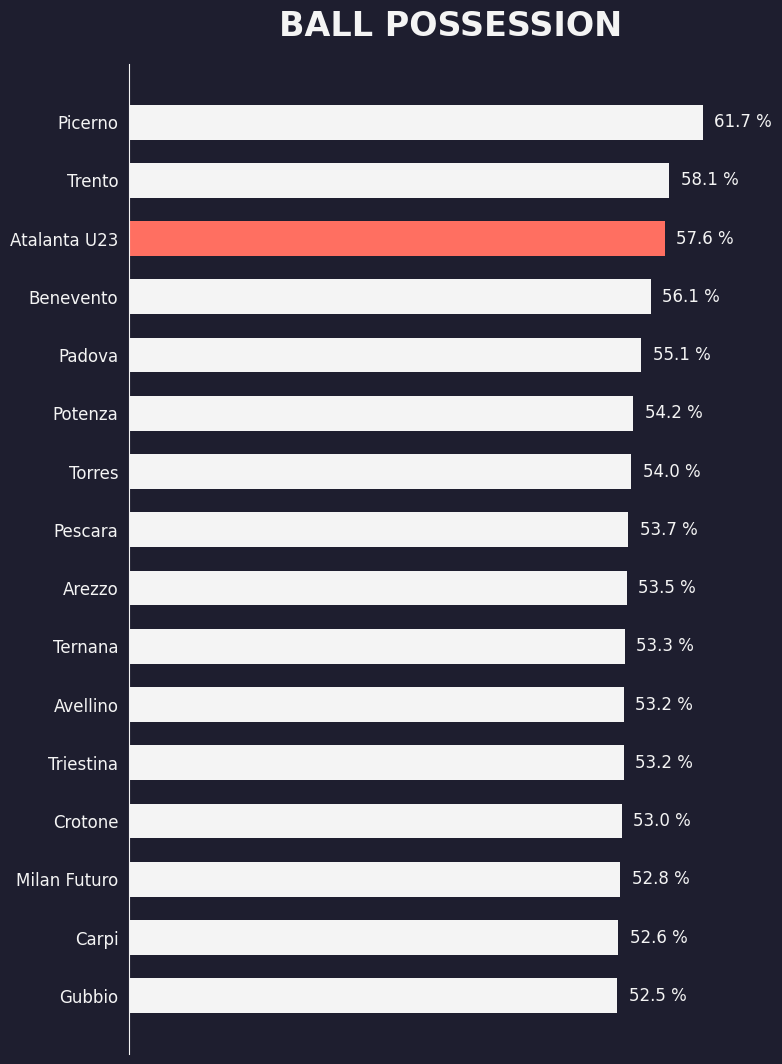

In [13]:
plot_stat_ranking(team, "BALL POSSESSION", stats["possession"], lower_is_better=False, is_percent=True)

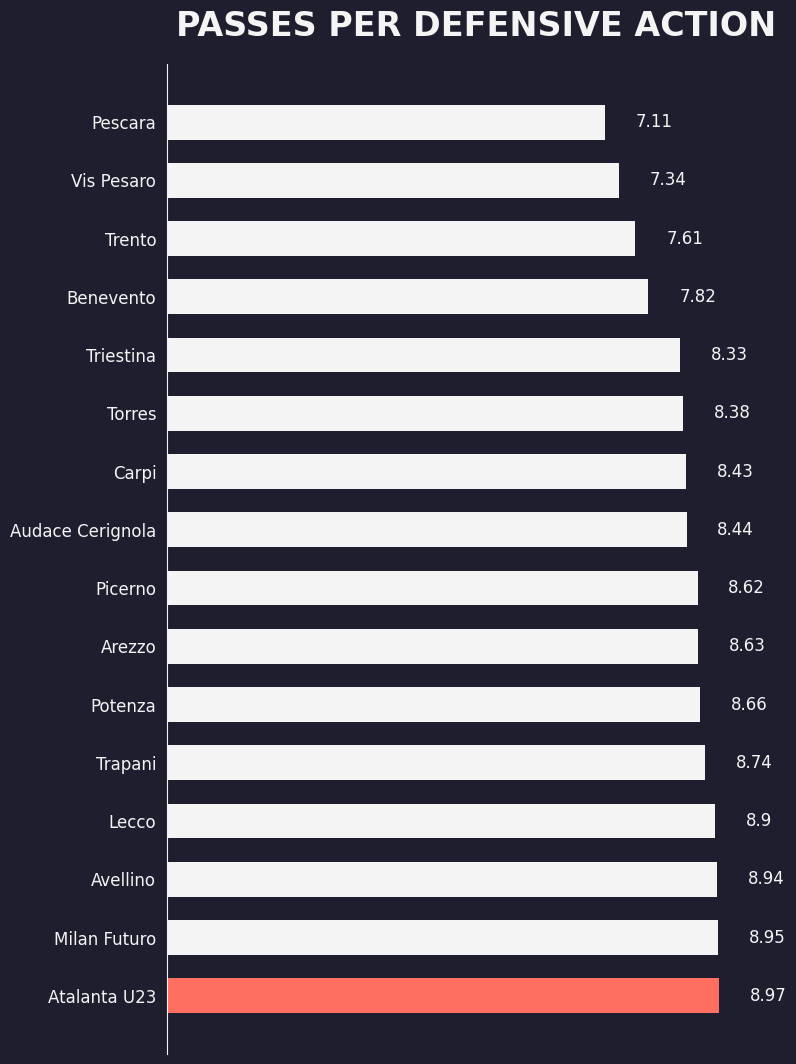

In [16]:
plot_stat_ranking(team, "PASSES PER DEFENSIVE ACTION", stats["ppda"], lower_is_better=True, is_percent=False)

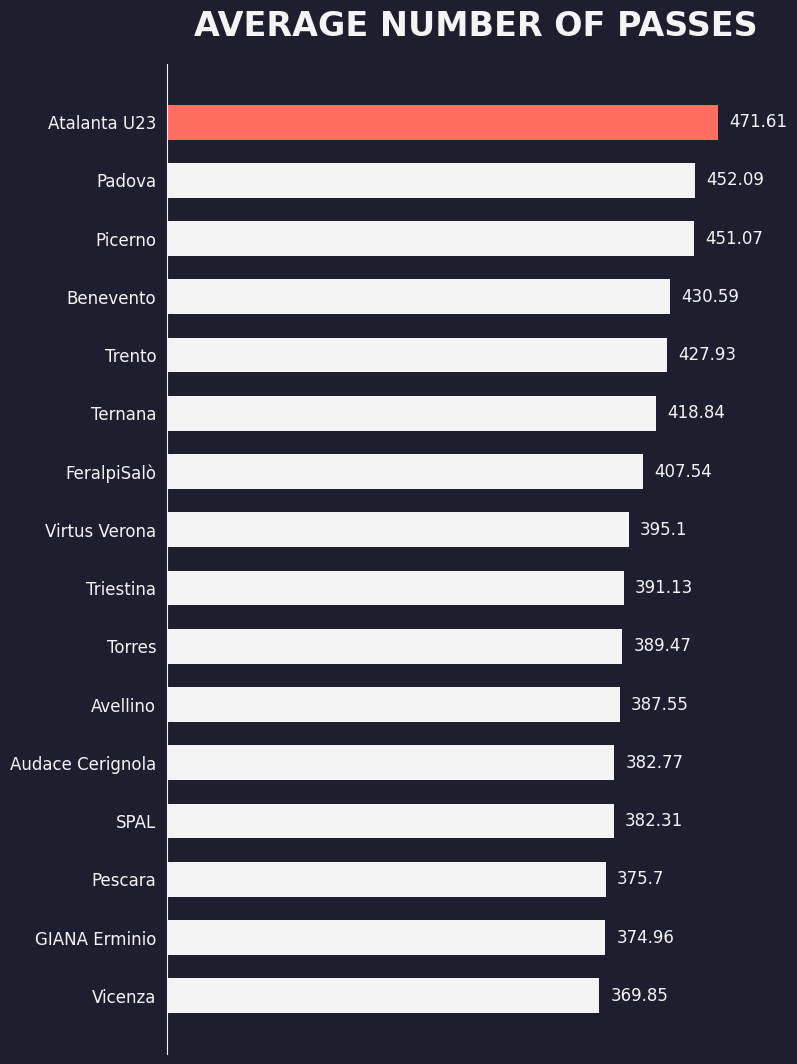

In [15]:
plot_stat_ranking(team, "AVERAGE NUMBER OF PASSES", stats["passes_par_90"], lower_is_better=False, is_percent=False)

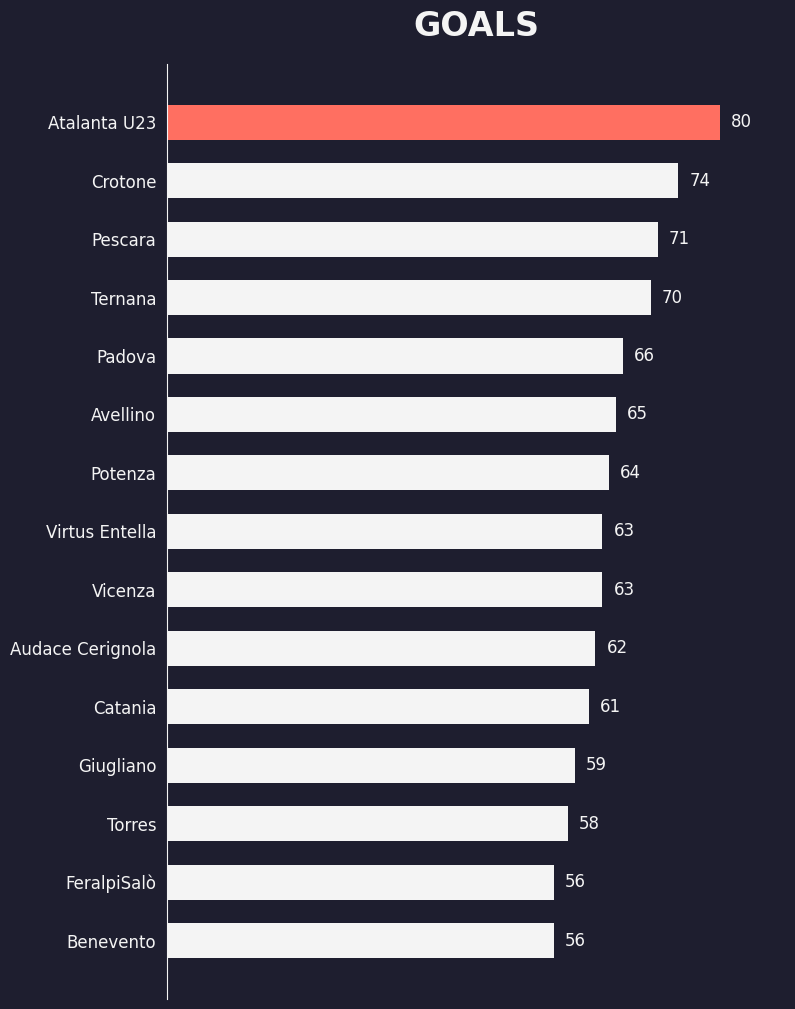

In [17]:
plot_stat_ranking(team, "GOALS", stats["goals"], lower_is_better=False, is_percent=False)

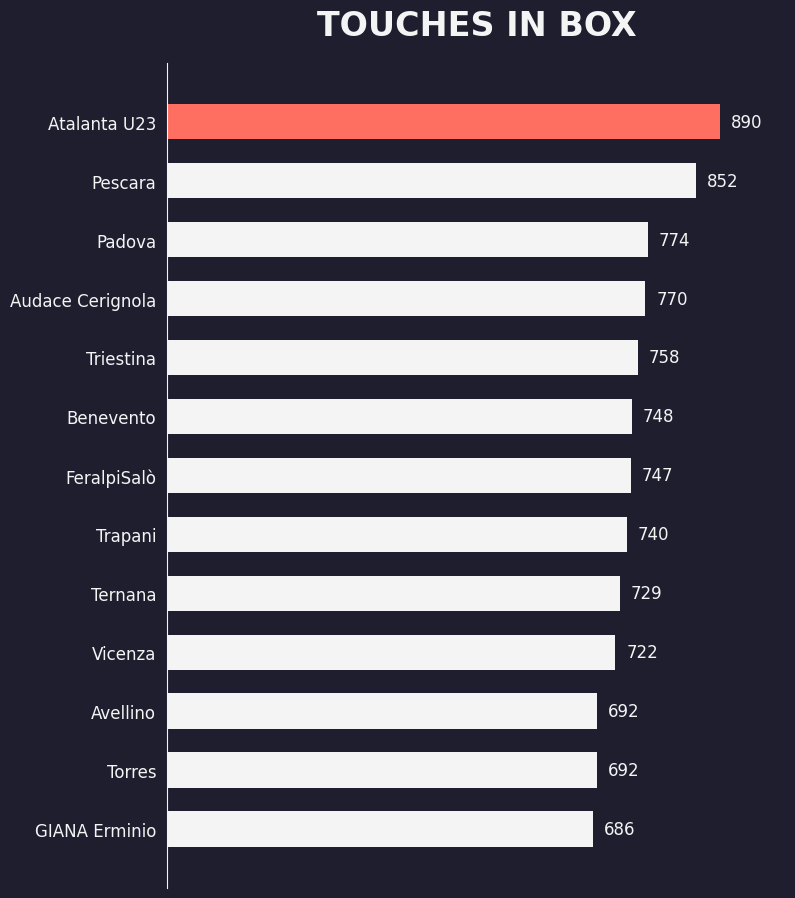

In [19]:
plot_stat_ranking(team, "TOUCHES IN BOX", stats["touches_in_box"], lower_is_better=False, is_percent=False)

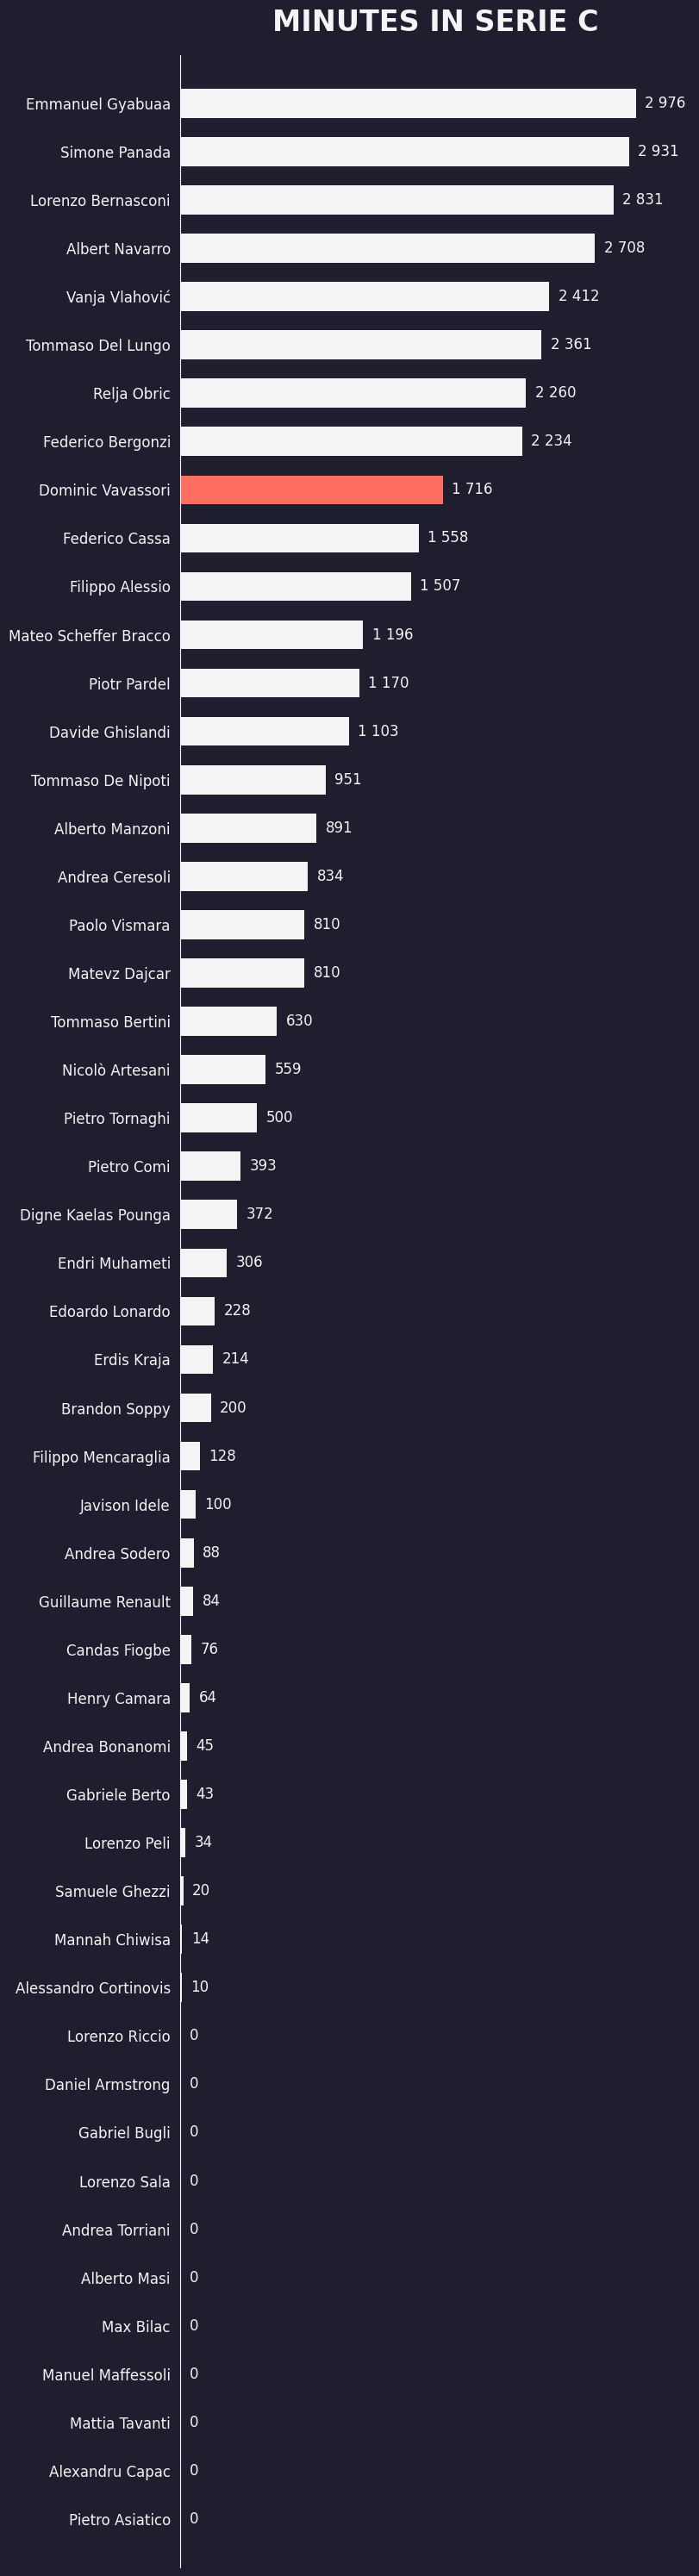

In [22]:
plot_stat_ranking("Dominic Vavassori", "MINUTES IN SERIE C", stats["minutes_atalanta_u23_seriec_2024_25"], lower_is_better=False, is_percent=False)

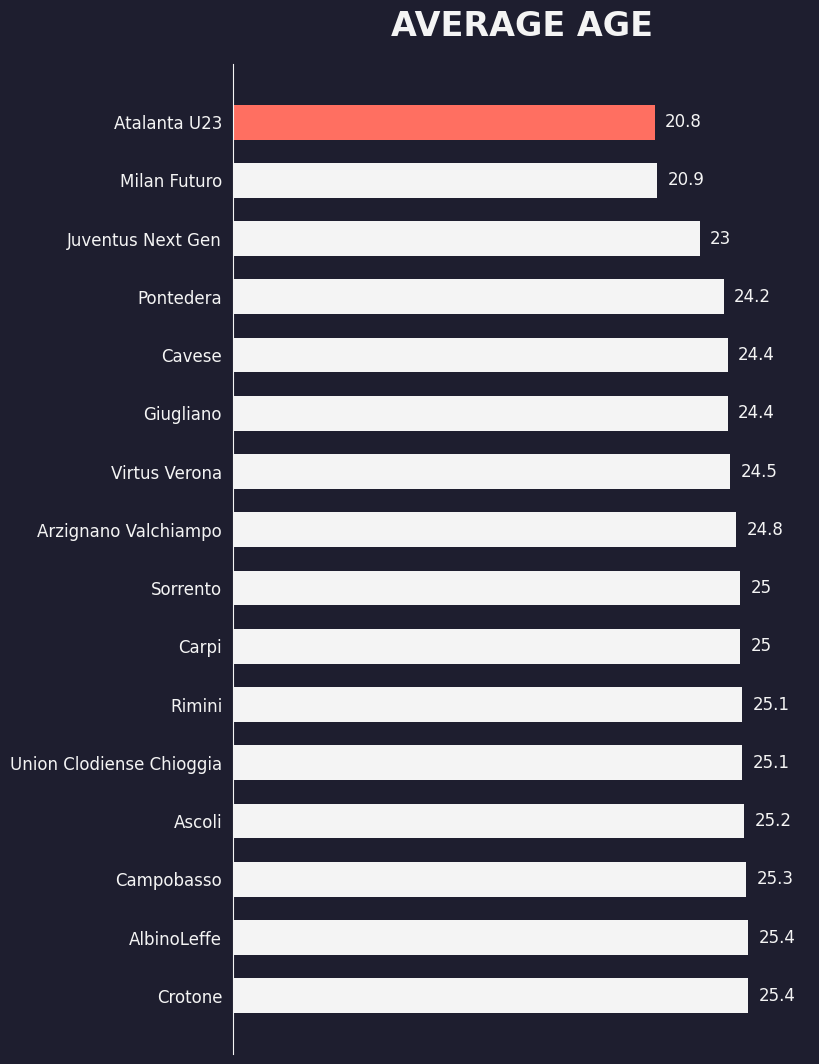

In [25]:
plot_stat_ranking(team, "AVERAGE AGE", stats["age_moyen"], lower_is_better=True, is_percent=False)

In [31]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt

def plot_minutes_per_match(
    minutes_by_match: dict,
    title: str,
    player_name: str,
    total_matchdays: Optional[int] = None,
    bar_width: float = 0.7,
    bar_color: str = "#90ee90",
    highlight_color: Optional[str] = None,
    dnp_color: Optional[str] = None,
):
    """Viz minutes/journée, avec DNP et highlight ≠ 90'."""
    bg = globals().get("bg_color", "#1e1e2f")
    txt = globals().get("primary_color", "#ffffff")
    highlight_color = highlight_color or globals().get("secondary_color", "#ff6f61")
    dnp_color = dnp_color or "#4b4d63"

    if total_matchdays is None:
        total_matchdays = max(minutes_by_match.keys()) if minutes_by_match else 34

    match_days = list(range(1, total_matchdays + 1))
    minutes = [0 if minutes_by_match.get(d) in (None, 0) else int(minutes_by_match.get(d)) for d in match_days]
    minutes_arr = np.array(minutes, dtype=int)

    played_mask = minutes_arr > 0
    full90_mask = minutes_arr == 90
    played = int(played_mask.sum())
    full_90 = int(full90_mask.sum())
    avg_minutes = float(minutes_arr[played_mask].mean()) if played else 0.0

    fig_w = max(12, 0.45 * total_matchdays)
    fig, ax = plt.subplots(figsize=(fig_w, 6), facecolor=bg)
    ax.set_facecolor(bg)

    for day, mins in zip(match_days, minutes_arr):
        color, alpha = bar_color, 0.9          # <-- toutes les barres vertes
        ax.bar(day, mins, width=bar_width, color=color, edgecolor="none", alpha=alpha)

        if mins > 0:
            ax.text(day, mins - 3, f"{mins}", ha="center", va="top",
                    color=bg, fontsize=12, fontweight="bold")
        else:
            ax.text(day, 2, "0", ha="center", va="bottom",
                    color=txt, fontsize=10, alpha=0.8)

    ymax = max(100, int(max(minutes_arr.max(), 95) + 15))
    ax.set_xlim(0, total_matchdays + 1)
    ax.set_ylim(0, ymax)

    ax.set_xticks(match_days)
    ax.set_xticklabels([str(d) for d in match_days], color=txt, fontsize=12)
    ax.set_yticks(list(range(0, 100, 10)))
    ax.set_yticklabels([str(y) for y in range(0, 100, 10)], color=txt, fontsize=12)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color(txt);   ax.spines["left"].set_alpha(0.3)
    ax.spines["bottom"].set_color(txt); ax.spines["bottom"].set_alpha(0.3)

    ax.grid(True, axis="y", linestyle="-", alpha=0.1, color=txt)
    ax.grid(False, axis="x")
    ax.tick_params(axis="x", length=0)

    ax.text((total_matchdays + 1) / 2, ymax * 0.96, title,
            ha="center", va="center", color=txt, fontsize=26, fontweight="bold")

    footnote = f"{player_name} — {played} appearances, {full_90} × 90', avg {avg_minutes:.1f}'"
    ax.text((total_matchdays + 1) / 2, -ymax * 0.12, footnote,
            ha="center", va="top", color=txt, fontsize=12, alpha=0.75, style="italic")

    plt.tight_layout()
    plt.show()

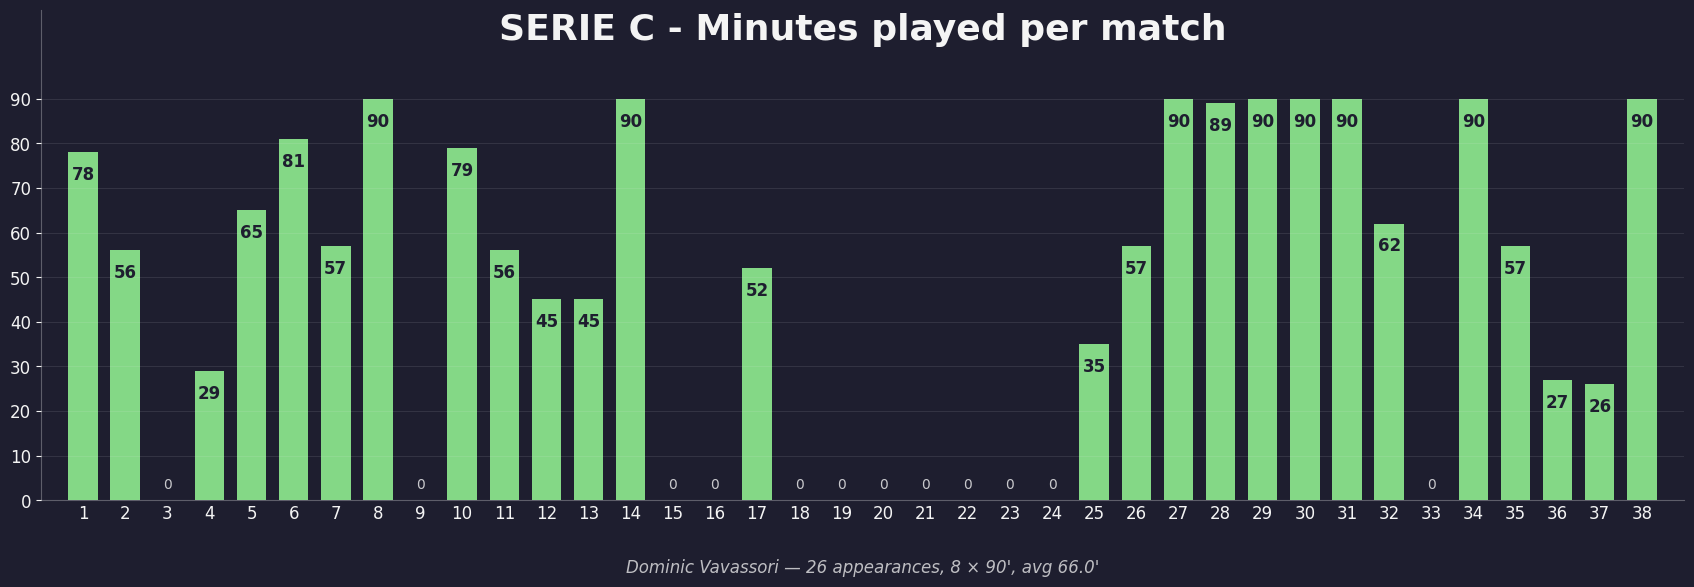

In [32]:
plot_minutes_per_match(
    stats["minutes_vavassori_seriec_2024_25"],
    title="SERIE C - Minutes played per match",
    player_name="Dominic Vavassori",
    total_matchdays=38,   # ajuste si besoin (34 ou 38 selon la ligue)
)